# ***Netflix Stock Price Prediction using LSTM***

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

***DATASET GENERATED***

In [2]:
dataset=pd.read_csv("/content/NFLX.csv")

In [4]:
dataset_train=dataset.iloc[-1000:-100]
dataset_test=dataset.iloc[-100:]
print(dataset_train.columns.tolist())
print(dataset_test.columns.tolist())

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


***DATASET_TRAIN***

In [5]:
trainset = dataset_train.iloc[:,1:2].values #Open
display(trainset[0:5])

array([[278.730011],
       [277.73999 ],
       [282.070007],
       [283.880005],
       [281.      ]])

In [6]:
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)
print(training_scaled[0:5])
print(len(training_scaled))

[[0.1202792 ]
 [0.11762178]
 [0.12924443]
 [0.13410283]
 [0.12637231]]
900


In [7]:
x_train = []
y_train = []

In [8]:
for i in range(60,len(training_scaled)):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)
print(x_train.shape,y_train.shape)

(840, 60) (840,)


In [9]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
print('(samples, time steps, features) =',x_train.shape)

(samples, time steps, features) = (840, 60, 1)


In [10]:
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [12]:
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

regressor.fit(x_train,y_train,epochs =300, batch_size = 32)

27/27 [==============================] - 4s 164ms/step - loss: 0.0042
Epoch 4/300
27/27 [==============================] - 3s 123ms/step - loss: 0.0039
Epoch 5/300
27/27 [==============================] - 3s 120ms/step - loss: 0.0043
Epoch 6/300
27/27 [==============================] - 5s 169ms/step - loss: 0.0042
Epoch 7/300
27/27 [==============================] - 3s 125ms/step - loss: 0.0041
Epoch 8/300
27/27 [==============================] - 3s 125ms/step - loss: 0.0045
Epoch 9/300
27/27 [==============================] - 4s 132ms/step - loss: 0.0040
Epoch 10/300
27/27 [==============================] - 4s 161ms/step - loss: 0.0039
Epoch 11/300
27/27 [==============================] - 3s 129ms/step - loss: 0.0038
Epoch 12/300
27/27 [==============================] - 3s 128ms/step - loss: 0.0038
Epoch 13/300
27/27 [==============================] - 5s 168ms/step - loss: 0.0041
Epoch 14/300
27/27 [==============================] - 3s 121ms/step - loss: 0.0037
Epoch 15/300
27/27 [===

***DATASET_TEST***

In [13]:
real_stock_price = dataset_test.iloc[:,1:2].values

dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis = 0)

In [14]:
print(len(dataset_total),len(dataset_test))
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
print(inputs.shape)

1000 100
(160,)


In [15]:
inputs = inputs.reshape(-1,1)
print(inputs.shape)

#sc = MinMaxScaler(feature_range = (0,1))
inputs = sc.transform(inputs)
print(inputs.shape)

(160, 1)
(160, 1)


In [16]:
x_test = []
for i in range(60,len(inputs)):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
print(x_test.shape)

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
print(x_test.shape)

(100, 60)
(100, 60, 1)


In [17]:
predicted_price = regressor.predict(x_test)

4/4 [==============================] - 2s 29ms/step


In [18]:
predicted_price = sc.inverse_transform(predicted_price)
print(predicted_price.shape)

(100, 1)


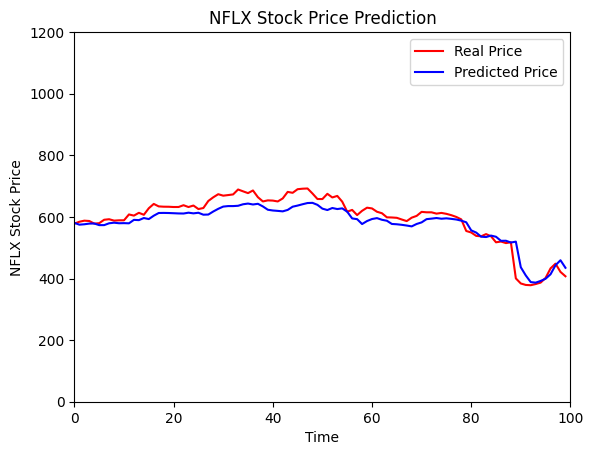

In [19]:
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('NFLX Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('NFLX Stock Price')
plt.xlim(0,100)
plt.ylim(0,1200)
plt.legend()
plt.show()

In [20]:
inputs = np.array(dataset_train['Open'][-60:])
new_predicted_price=[]
for i in range(100):
    x = np.reshape(inputs, (1,60,1))
    pred = regressor.predict(x)
    inputs = np.append(inputs, pred)
    inputs = inputs[1:]
    new_predicted_price+=[pred.reshape(-1)]

1/1 [==============================] - 0s 37ms/step


In [21]:
new_predicted_price = sc.inverse_transform(np.array(new_predicted_price))
print(new_predicted_price.shape)

(100, 1)


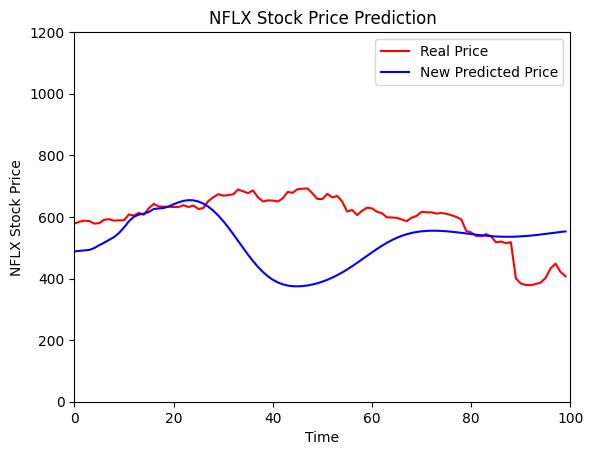

In [22]:
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(new_predicted_price, color = 'blue', label = 'New Predicted Price')
plt.title('NFLX Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('NFLX Stock Price')
plt.xlim(0,100)
plt.ylim(0,1200)
plt.legend()
plt.show()

In [25]:
inputs = np.array(dataset_train['Open'][-40:])
new_2predicted_price=[]
for i in range(100):
    x = np.reshape(inputs, (1,40,1))
    pred = regressor.predict(x)
    inputs = np.append(inputs, pred)
    inputs = inputs[1:]
    new_predicted_price+=[pred.reshape(-1)]

1/1 [==============================] - 0s 77ms/step


In [27]:
new_2predicted_price = sc.inverse_transform(np.array(new_predicted_price))
print(new_predicted_price.shape)

(100, 1)


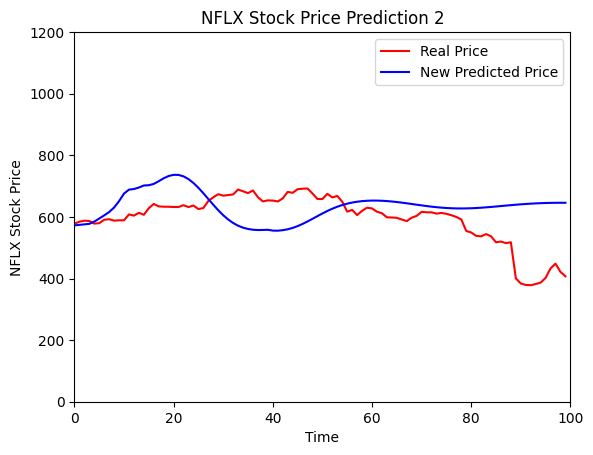

In [30]:
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(new_predicted_price, color = 'blue', label = 'New Predicted Price')
plt.title('NFLX Stock Price Prediction 2')
plt.xlabel('Time')
plt.ylabel('NFLX Stock Price')
plt.xlim(0,100)
plt.ylim(0,1200)
plt.legend()
plt.show()